# TP Final - Aprendizaje de máquinas I (CEIA - FIUBA)

## Integrantes
 - Diego José Araujo Arellano
 - Carolina Perez Omodeo
 - Fausto Juárez Yélamos
 - Emiliano Uriel Martino
 - Juan Pablo Hagata
 - Santiago Francisco Belen.

---

## Propuesta de Investigación: Tasa de abandono (Churn)

1. #### **Objetivo**:
   Identificar el modelo que mejor se ajuste a los datos y ofrezca la mayor capacidad predictiva para detectar a los clientes con mayor probabilidad de darse de baja (churn) del servicio proporcionado por la empresa.

2. #### **Justificación**:
   Modelos de clasificación óptimos permitirán implementar estrategias de retención más efectivas y reducir significativamente su tasa de abandono, mejorando la retención de clientes y, en consecuencia, sus ingresos y sostenibilidad a largo plazo.

3. #### **Metodología**:
   Se utilizará el conjunto de datos de [Customer Churn Dataset (Kaggle)](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset). La metodología incluirá:
   
   - **Exploración y preprocesamiento de datos**:
      - Análisis descriptivo
      - Análisis de dispersión y gráficos exploratorios
      - Análisis de correlación
   - **Selección de características y transformación**
      - Basados en el analisis exploratorio se seleccionarán las características más relevantes para el modelo.
      - Se aplicarán técnicas de escalado y transformacion de datos.
   - **Construcción de modelos de machine learning**: Se entrenaran los siguientes modelos de clasificacion:
      - Regresión Logística
      - Árbol de Decisión
      - Árbol de Decisión con optimizacion de hiperparametros
      - Random Forest
      - XGBOOST
      - Red Neuronal
   - **Evaluación del desempeño del modelo**:
      - Sensibilidad (TPR)
      - Especificidad (TNR)
      - Exactitud Balanceada
      - Precisión
      - Recuperación (Recall)
      - F1-score
   - **Conclusiones**


---


### Visión General: Tasa de abandono o Churn Rate

El churn rate (también conocido como *tasa de cancelación* o *tasa de abandono*) es una de las métricas más importantes para que una empresa se autoevalúe. Este indicador clave de rendimiento (KPI) se busca mejorar continuamente (*minimizar*) en el ámbito empresarial, ya que suele ser más costoso adquirir nuevos clientes que retener a los existentes.

Bajo esta lógica, no es necesario realizar grandes inversiones adicionales en tiempo o dinero para que un cliente existente prefiera la empresa sobre la competencia, ya que esa elección ya fue hecha anteriormente. Sin embargo, es fundamental implementar acciones efectivas para fidelizar a estos clientes

##### _Cálculo del Churn Rate_

Esta métrica representa el porcentaje de clientes o suscriptores que cancelan un producto o servicio en un período determinado. Su fórmula es:

$$
\text{Churn Rate} = \frac{\text{N° de clientes que se dieron de baja durante el período}}{\text{N° total de clientes al inicio del período}} \times 100
$$

Dónde:

- **N° de clientes que se dieron de baja durante el período**: Total de clientes que dejaron de utilizar los servicios de la empresa en el período analizado.
- **N° total de clientes al inicio del período**: Cantidad de clientes que la empresa tenía al comienzo del período analizado.

##### _Factores de Abandono_
El abandono puede producirse por varias razones, y es crucial que las empresas entiendan estas causas para gestionarlas eficazmente. Entre los motivos más comunes se encuentran:

- **Precios elevados o una percepción de que el precio no se justifica**

- **Insatisfacción con el servicio o producto ofrecido**

- **Mejor oferta de la competencia**

- **Mala atención al cliente**

- **Cambio en las necesidades del cliente**

##### _Estrategias de Retención_

En respuesta a las causas de abandono identificadas, se pueden implementar diversas estrategias de retención (Con mayor o menor gasto para la empresa), tales como:

- **Mejora del servicio:**

- **Optimización de la atención al cliente:**

- **Programas de lealtad y retención:**

- **Personalización de la experiencia del cliente:**

- **Revisión de la estrategia de precios:**

---

### Descripción Detallada de las Variables del Dataset

| **Variable**            | **Descripción**                                                                                       |
|-------------------------|-------------------------------------------------------------------------------------------------------|
| **CustomerID**          | Key único que identifica al cliente.                                                                  |
| **Edad** (*Age*)            | Edad del cliente.                                                                                     |
| **Sexo** (*Gender*)            | Sexo del cliente.                                                                                     |
| **Permanencia**   (*Tenure*)      | Meses de permanencia del cliente. |
| **Frecuencia de uso** (*Usage Frequency*) | Frecuencia de uso mensual de los servicios de la empresa.             |
| **Llamadas de soporte** (*Support Calls*)| Llamadas mensuales a atencion al cliente.         |
| **Retraso en el pago** (*Payment Delay*) | Días de retraso en el pago.                                   |
| **Tipo de suscripción** (*Subscription Type*) | Tipo de suscripción.                                                           |
| **Duración del contrato** (*Contract Length*) | Duración del contrato.                                     |
| **Gasto total**   (*Total Spend*)      | Gasto total del cliente.        |
| **Última interacción** (*Last Interaction*) | Días desde la última interacción con la empresa.         |
| **Churn**               | (1) Se dio de baja. (0) No se dio de baja.                            |


In [1]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


### **Exploración y preprocesamiento de datos**:

In [2]:
# ---------------- Paquetes a utilizar ----------------

# Básicos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Manipulación de datos | Métricas
from sklearn.preprocessing import StandardScaler # Reescalamiento de variables
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Búsqueda de hiperparámetros
import optuna

In [3]:
# ---------------- Drive.mount -----------------------
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
# ---------------- Carga datos -------------------------

#churn_customer_train = pd.read_csv("./datasets/customer_churn_dataset-training-master.csv")
#churn_customer_test = pd.read_csv("./datasets/customer_churn_dataset-testing-master.csv")

#churn_customer_train = pd.read_csv("./drive/MyDrive/datasets//customer_churn_dataset-training-master.csv") #Cogido Drive Caro
#churn_customer_test = pd.read_csv("./drive/MyDrive/datasets//customer_churn_dataset-testing-master.csv") #Cogido Drive Caro

churn_customer_train = pd.read_csv("data/customer_churn_dataset-training-master.csv")
churn_customer_test = pd.read_csv("data/customer_churn_dataset-testing-master.csv")

# Se hacen copias de los datos originales para trabajar y se dejan los originales intactos.
customer_train = churn_customer_train.copy()
customer_test = churn_customer_test.copy()

In [5]:
# ---------------- Remuestreo aleatorio ---------------------
# Dado que los datos ya están divididos en conjuntos de entrenamiento y prueba sin información detallada sobre el método de partición,
# se opto por concatenar ambos conjuntos y realizar un muestreo aleatorio para garantizar una división adecuada (80/20)

customer_all = pd.concat([customer_train, customer_test], axis=0)

train_sample = customer_all['CustomerID'].sample(n=int(customer_all.shape[0]*0.8), random_state=42)
customer_train = customer_all[customer_all['CustomerID'].isin(train_sample)]
customer_test = customer_all[~customer_all['CustomerID'].isin(train_sample)]

- ##### **Analisis descriptivo**:
    - **Filas:** 424,255 . Una de las cuales impresiona ser null. Numero final: 424,254
    - **Columnas:** 12
        - _Categoricas (3)_: Gender, Subscription Type, Contract Length.
        - _Numericas (9)_: CustomerID, Age, Tenure, Usage Frequency, Support Calls, Payment Delay, Total Spend, Last Interaction, Churn.

<br>

- **Estadisticas descriptivas variables numericas**

    | **Variable**            | **Media**                                            |           **Desvio**                                 |  **Valores** (Min - Max) |
    |-------------------------|---------------------------------------------------- |---------------------------------------------------|-------|
    | **Edad** (*Age*)            |  39.8                                          |    12.7                                       | 18 - 65      |
    | **Permanencia**   (*Tenure*)      | 31.3  | 17.2 |   1 - 60    |
    | **Frecuencia de uso** (*Usage Frequency*) | 15.6       |  8.6       |  1 - 30     |
    | **Llamadas de soporte** (*Support Calls*)| 3.8     | 3.1     |   0 - 10     |
    | **Retraso en el pago** (*Payment Delay*) | 3.6    |  8.4                              |   0 - 30      |
    | **Gasto total**   (*Total Spend*)      | 616.5    |  246.5   | 100 - 1000        |
    | **Última interacción** (*Last Interaction*) | 14.6    |  8.6    |    1 - 30     |
    | **Churn**               | 0.56       |  0.49   |   0 - 1    |  
 
<br>

- **Estadisticas descriptivas variables categoricas**

    | **Variable**            | **Categorias + Porcentajes**                                            |
    |-------------------------|---------------------------------------------------- |
    | **Sexo** (*Gender*)             |  Femenino: 44.8%<br>Masculino: 55.1%                                           |
    | **Tipo de suscripción** (*Subscription Type*) | Básica: 32.6%<br>Estándar: 33.7%<br>Premium: 33.6%                                                        |
    | **Duración del contrato** (*Contract Length*)            | Mensual: 22.2%<br>Semestral: 38.7%<br> Anual: 38.9%     |
    

In [6]:
# ---------------- Descripción inicial  ---------------------
# Tipos de datos, Valores no nulos y uso de memoria
customer_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424255 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         424254 non-null  float64
 1   Age                424254 non-null  float64
 2   Gender             424254 non-null  object 
 3   Tenure             424254 non-null  float64
 4   Usage Frequency    424254 non-null  float64
 5   Support Calls      424254 non-null  float64
 6   Payment Delay      424254 non-null  float64
 7   Subscription Type  424254 non-null  object 
 8   Contract Length    424254 non-null  object 
 9   Total Spend        424254 non-null  float64
 10  Last Interaction   424254 non-null  float64
 11  Churn              424254 non-null  float64
dtypes: float64(9), object(3)
memory usage: 42.1+ MB


In [7]:
# ---------------- Datos faltantes ---------------------
# Test no tiene nulos, train parece tener una fila toda vacía (nan) que hay que eliminar

print(f"Datos faltantes en train sample:")
print(customer_train.isnull().sum(axis = 0))
print('-----------------------------------')
print(f"Datos faltantes en test sample:")
print(customer_test.isnull().sum(axis = 0))

Datos faltantes en train sample:
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64
-----------------------------------
Datos faltantes en test sample:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [8]:
# ---------------- Eliminar nulos ---------------------
print(customer_train.shape)
customer_train = customer_train.dropna()
print(customer_train.shape)

(424255, 12)
(424254, 12)


In [9]:
# ---------------- Primeras Filas  ---------------------
customer_train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [10]:
# ---------------- Estadistica descriptiva Var_num -------------
customer_train.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,424254.000000,424254.000000,424254.000000,424254.000000,424254.000000,424254.000000,424254.000000,424254.000000,424254.000000
mean,192812.690190,39.815733,31.334891,15.688571,3.898695,13.623511,616.565791,14.657823,0.563344
std,138764.323379,12.740605,17.240007,8.624249,3.147760,8.496840,246.574092,8.613451,0.495972
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,55848.250000,29.000000,16.000000,8.000000,1.000000,6.000000,437.000000,7.000000,0.000000
50%,180506.000000,40.000000,32.000000,16.000000,3.000000,13.000000,645.000000,14.000000,1.000000
75%,315381.750000,49.000000,46.000000,23.000000,6.000000,20.000000,822.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


- ##### **Graficos Exploratorios "Variables numericas"**:


<p align="center">
  <img src="Fig/Grafico_exploratorio_numerico.png" alt="Grafico exploratorio variables numericas" width="1300"/>
</p>

**Puntos destacados generales:**
  - Se observa que algunas características / comportamientos de los clientes (Edad, llamadas a soporte, ultima interacción, retraso en el pago y el gasto total, parecen diferenciar a los clientes que abandonan.
  - En general todas las variables muestran una amplia varianza. Sin embargo, algunas variables (en particular dentro de los clientes que abandonan) presentan una dispersión aún mayor si se observan los rangos intercuartílicos, indicando que dentro del grupo de clientes que abandonan, hay una mayor diversidad en las características o comportamientos. 

**Puntos destacados por variable:**
- A) Edad: La distribución de la edad para los clientes que abandonan (churn = 1) es ligeramente mayor en edades más avanzadas
- B) Llamados a Soporte: El grupo de clientes que abandonan presenta una mediana y varianza de llamadas mucho más alta. Por otro lado, los clientes que no abandonan, la mayoría hace entre 0 y 2 llamadas a soporte, con algunas excepciones (outliers) que indican un pequeño número de clientes con más llamadas.
- C) Ultima interacción: La mayoría de los clientes tienen una interacción reciente, independientemente de si abandonan o no. Sin embargo, a medida que aumenta el tiempo desde la última interacción, la proporción de clientes que abandonan parece aumentar ligeramente, especialmente en los rangos más altos (20 a 30).
- D) Permanencia: Ambos grupos muestran una mediana alrededor de los 30 meses y una varianza considerable
- E) Retraso en el pago: La mediana del retraso en el pago es más alta para los clientes que abandonaron, presentando una mayor dispersion si se observan los rangos intercuartilicos. Se observa que a medida que aumentan los días de retraso en el pago, la proporción de clientes que abandonan aumenta. 
- F) Frecuencia de uso: Ambos grupos muestran una mediana similar y una varianza considerable.
- G) Gasto total: La mediana del gasto total y la varianza es más alta para los clientes que no abandonan con algunos valores atípicos (outliers) en el rango inferior. A modo general, se observa que para los niveles de gasto más bajos (por debajo de 400), hay una mayor proporción de clientes que abandonan. 

**Conclusiones:**

Los clientes que abandonan el servicio tienden a ser de mayor edad (especialmente entre 50 y 60 años), realizan más llamadas a soporte, tienen menos interacciones recientes, presentan retrasos más largos en los pagos, y muestran un menor gasto total, lo que sugiere problemas no resueltos, insatisfacción, desinterés creciente o problemas financieros. En contraste, la frecuencia de uso y la permanencia no muestran diferencias significativas entre los que abandonan y los que no, siendo factores menos relevantes para predecir el churn



- ##### **Graficos Exploratorios "Variables categoricas"**:

<p align="center">
  <img src="Fig/Grafico_exploratorio_categorico.png" alt="Grafico exploratorio variables categoricas" width="800"/>
</p>


**Puntos destacados generales:**
  - Se observa que tanto las características demográficas (sexo), como las características del servicio (tipo de suscripción y la duración del contrato) tienen un impacto en la tasa de abandono de clientes.


**Puntos destacados por variable:**
- A) Abandono: La distribución entre los clientes que se quedan (56.33%) y los que abandonan (43.67%) está relativamente equilibrada.
- B) Tipo de subscripción: La suscripción básica presenta la mayor tasa de abandono con un 57.61%. Sin embargo, todos los tipos de suscripción muestran una tasa de abandono superior al 55%.
- C) Duracion del contrato: Los contratos mensuales presentan una tasa de abandono extremadamente alta del 89.15. Los clientes con contratos anuales y trimestrales muestran tasas de abandono mucho más bajas y equilibradas. 
- D) Sexo: Las mujeres presentan una tasa de abandono significativamente alta del 65.51%


**Conclusiones:**
Los clientes que abandonan el servicio tienden a tener contratos mensuales, que presentan la mayor tasa de abandono (89.15%), lo que indica un menor compromiso con la empresa y una mayor sensibilidad a cambios en precios o calidad del servicio. Sin embargo, todas las suscripciones muestran tasas de abandono superiores al 55% sugiriendo una percepcion de menor valor en todos los planes. Es llamativa la gran tasa de abandono en el sexo femenino 65%, que podria requerir una investigación más profunda, como encuestas de satisfacción y análisis de comportamiento, para comprender mejor las causas especificas. 


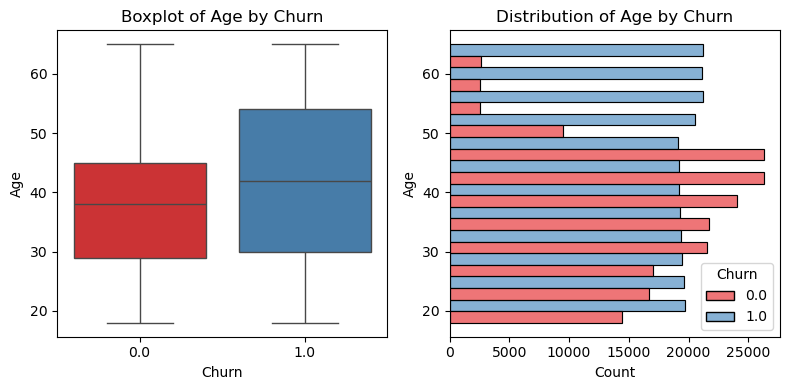

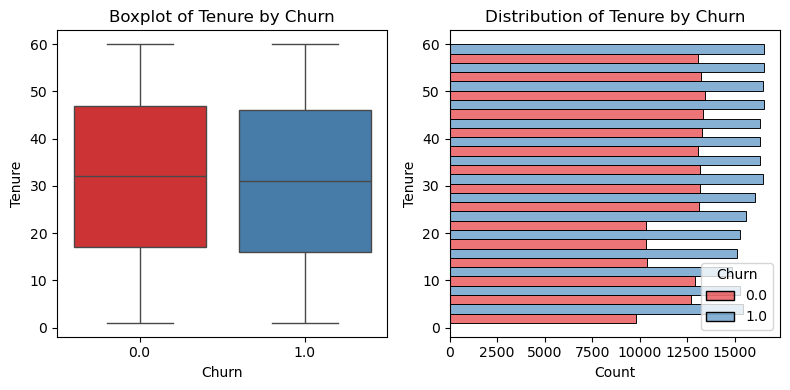

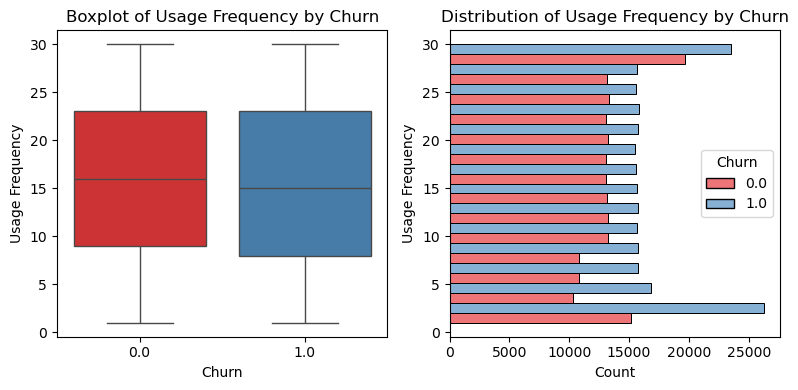

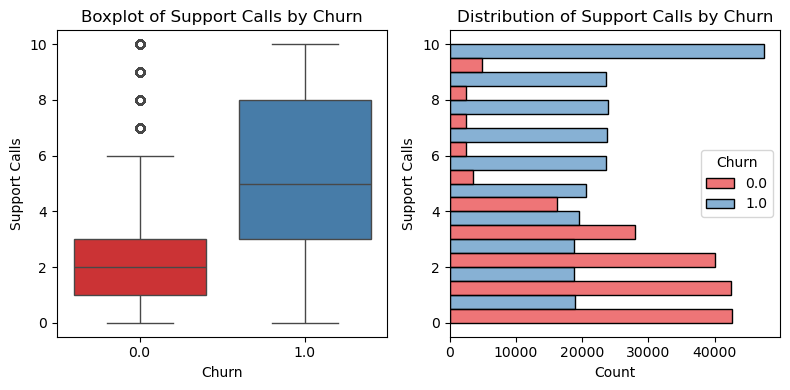

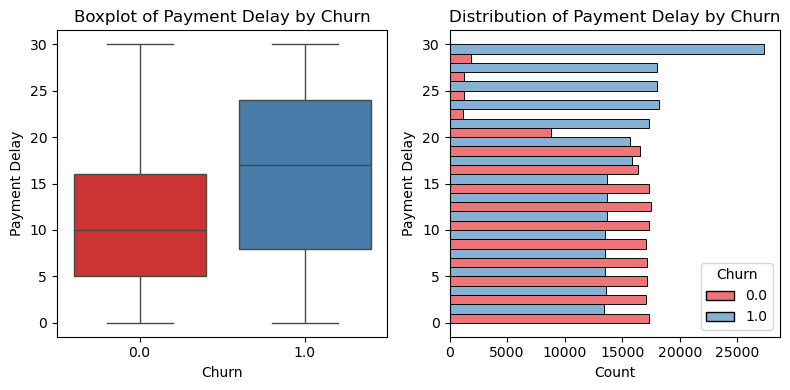

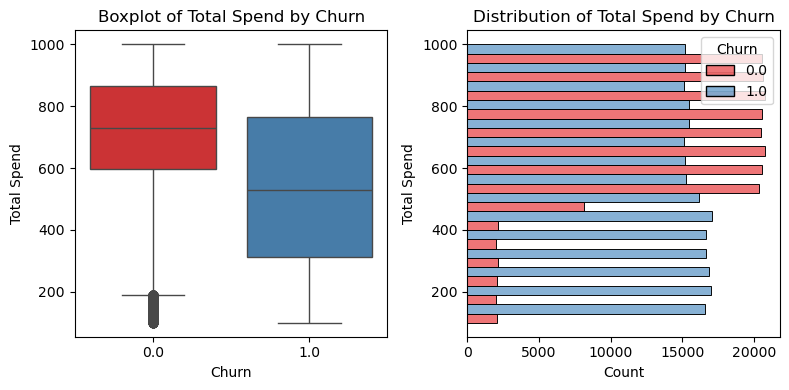

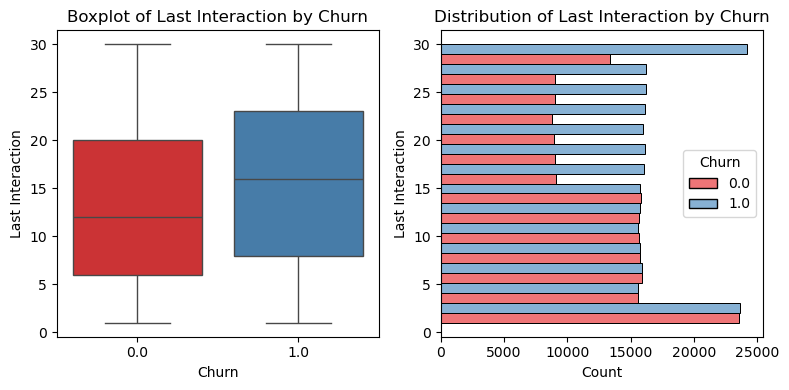

In [11]:
# ---------------- Graficos Exploratorios Var_num -------------
# Seleccionar columnas numéricas para los gráficos
numerical_columns = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls',
                     'Payment Delay', 'Total Spend', 'Last Interaction']

binwidths = {
    'Age': 4,
    'Tenure': 4,
    'Usage Frequency': 2,
    'Support Calls': 1,
    'Payment Delay': 2,
    'Total Spend': 60,
    'Last Interaction': 2
}

# Iterar sobre las columnas numéricas para crear boxplots e histogramas individuales por Etiqueta
for col in numerical_columns:
    # Crear una figura con dos subplots en la misma fila
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Crear el boxplot en el primer subplot
    sns.boxplot(ax=axes[0], x='Churn', y=col, data=customer_train, hue='Churn', palette="Set1")
    axes[0].set_title(f'Boxplot of {col} by Churn')
    axes[0].set_xlabel('Churn')
    axes[0].set_ylabel(col)
    axes[0].legend([], [], frameon=False)

    # Crear el histograma en el segundo subplot con orientación vertical utilizando el binwidth específico
    sns.histplot(ax=axes[1], data=customer_train, y=col, hue='Churn', binwidth=binwidths[col], kde=False, palette="Set1", alpha=0.6, stat='count', multiple="dodge")
    axes[1].set_title(f'Distribution of {col} by Churn')
    axes[1].set_ylabel(col)
    axes[1].set_xlabel('Count')

    # Ajustar el espaciado entre los subplots
    plt.tight_layout()

    # Mostrar la figura
    plt.show()

In [12]:
# ---------------- Estadistica descriptiva Var_Cat -------------
# Lista de variables categóricas
categorical_columns = ['Gender', 'Subscription Type', 'Contract Length']

# Función para mostrar valores únicos y sus porcentajes
def unique_values_percentage(df, categorical_columns):
    for col in categorical_columns:
        print(f"Variable: {col}")
        counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True) * 100
        summary_df = pd.DataFrame({'Count': counts, 'Percentage': percentages})
        print(summary_df)
        print('-----------------------------------')

print("Train sample:")
unique_values_percentage(customer_train, categorical_columns)

print("Test sample:")
unique_values_percentage(customer_test, categorical_columns)

Train sample:
Variable: Gender
         Count  Percentage
Male    233943   55.142203
Female  190311   44.857797
-----------------------------------
Variable: Subscription Type
           Count  Percentage
Standard  143083   33.725787
Premium   142822   33.664267
Basic     138349   32.609946
-----------------------------------
Variable: Contract Length
            Count  Percentage
Annual     165424   38.991736
Quarterly  164451   38.762392
Monthly     94379   22.245872
-----------------------------------
Test sample:
Variable: Gender
        Count  Percentage
Male    46330   57.231446
Female  34622   42.768554
-----------------------------------
Variable: Subscription Type
          Count  Percentage
Standard  27547   34.028807
Premium   27277   33.695276
Basic     26128   32.275917
-----------------------------------
Variable: Contract Length
           Count  Percentage
Annual     33184   40.992193
Quarterly  32913   40.657427
Monthly    14855   18.350380
----------------------------

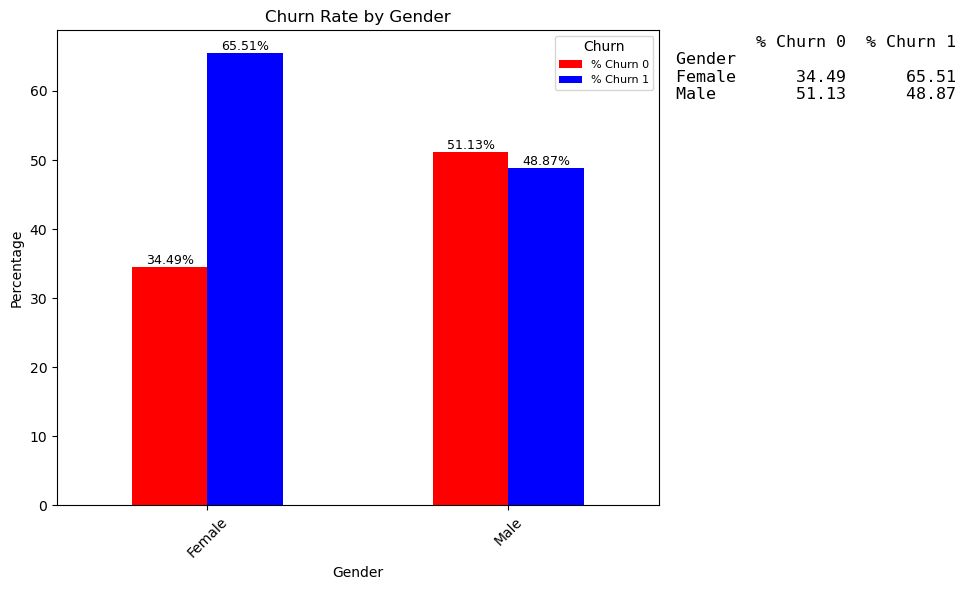

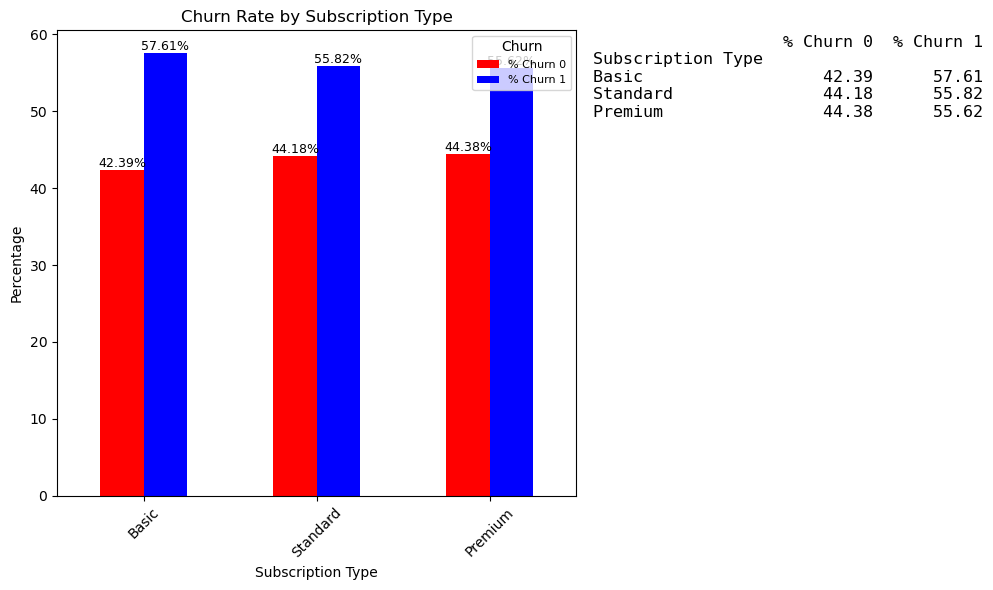

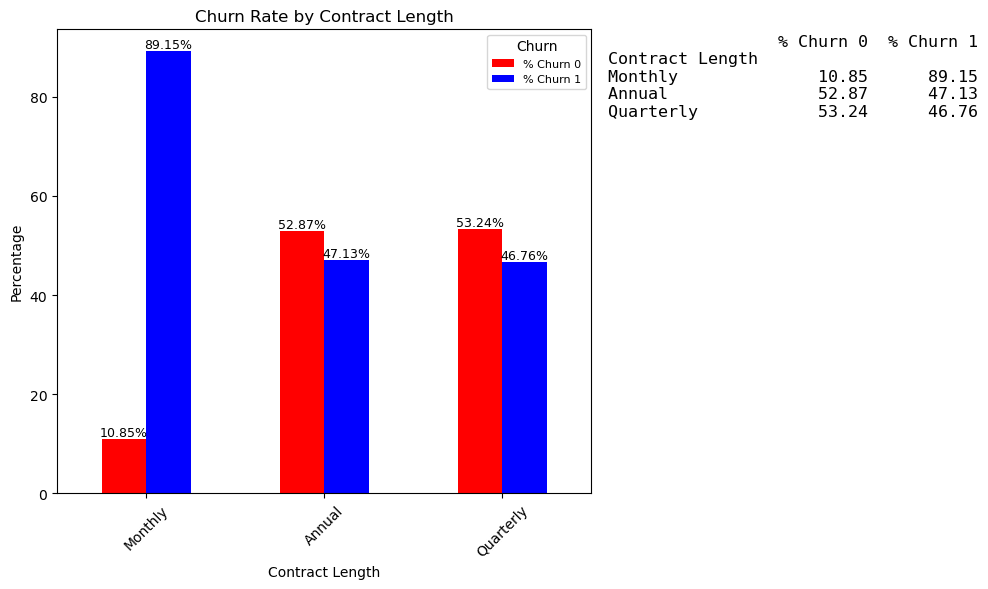

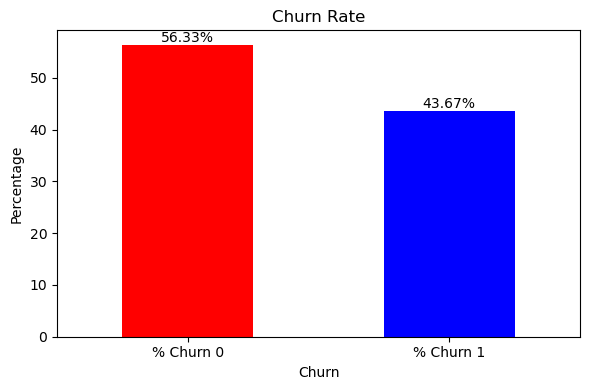

In [13]:
# ---------------- Graficos Exploratorios Var_Cat -------------
categorical_columns = ['Gender', 'Subscription Type', 'Contract Length']

# Iterar sobre las variables categóricas para crear gráficos de barras y mostrar DataFrame
for col in categorical_columns:
    # Calcular los porcentajes y ordenar por la columna '% Etiqueta 1'
    percentages = customer_train.groupby([col], observed=False)['Churn'].value_counts(normalize=True).unstack().fillna(0)

    # Multiplicar por 100 para obtener porcentajes y redondear
    percentages = (percentages * 100).round(2)

    # Renombrar las columnas para mayor claridad
    percentages.columns = ['% Churn 0', '% Churn 1']

    # Ordenar los valores para la visualización
    percentages = percentages.sort_values(by='% Churn 1', ascending=False)

    # Crear una figura con dos subplots en la misma fila
    fig, axes = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [3, 1]})

    # Crear el gráfico de barras en el primer subplot
    ax = percentages.plot(kind='bar', color=['red', 'blue'], ax=axes[0])

    # Añadir título y etiquetas
    ax.set_title(f'Churn Rate by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Mostrar porcentajes sobre las barras con un tamaño de fuente más pequeño
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center',
                    va='bottom',
                    fontsize=9)

    # Ajustar el tamaño de la leyenda
    ax.legend(title='Churn', prop={'size': 8})

    # Mostrar el DataFrame en el subplot derecho
    axes[1].axis('off')  # Apagar el eje del gráfico para que no se vea el marco
    table_text = percentages.to_string(index=True)
    axes[1].text(0.01, 0.99, table_text, transform=axes[1].transAxes, fontsize=12, verticalalignment='top', fontfamily='monospace')

    # Ajustar la visualización
    plt.tight_layout()
    plt.show()


# Calcular los porcentajes de Churn
churn_percentages = customer_train['Churn'].value_counts(normalize=True) * 100
churn_percentages = churn_percentages.round(2)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(6, 4))
churn_percentages.plot(kind='bar', color=['red', 'blue'], ax=ax)

# Añadir título y etiquetas
ax.set_title('Churn Rate')
ax.set_xlabel('Churn')
ax.set_ylabel('Percentage')
ax.set_xticklabels(['% Churn 0', '% Churn 1'], rotation=0)

# Mostrar porcentajes sobre las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='bottom',
                fontsize=10)

# Ajustar la visualización
plt.tight_layout()
plt.show()

- ##### **Mapa de correlación**:

<p align="center">
  <img src="Fig/Heatmap.png" alt="Heatmap" width="1000"/>
</p>


**Transformacion a variables "Dummy":**
En vista de los resultados obtenidos en el analisis exploratorio, se decide transformar a variables *dummy* las siguientes variables: Sexo, Duracion del contrato y Tipo del contrato. Esto permitira que los modelos de machine learning procesen la información categórica de manera efectiva y sin inducir un orden o relación no deseada entre las categorías.

**Analisis de corelacion con la variable "Abandono"**
Realizamos un mapa de correlacion con el objetivo de identificar variables predictoras más relevantes, ayudar a bajar la dimensionalidad y simplificar el modelo.

- **Correlacion moderada**
  - Llamados a soporte ($+0.50$): Clientes que llaman más al soporte abandonan mas frecuentemente. Podría sugerir que tienen más problemas o están menos satisfechos.
  - Contrato Mensual ($+0.35$): Clientes con contratos mensuales abandonan mas frecuentemente. Probablemente relacionado a la flexibilidad de los contratos mensuales, que permiten una salida más fácil.
  - Retraso en el pago($+0.33$): Retrasos en los pagos están asociados con una mayor probabilidad de abandono.
  - Gasto total ($-0.36$): Clientes que gastan más tienden a quedarse más tiempo.

- **Correlacion debil**
  - Edad ($+0.19$): Clientes de mayor edad abandonan mas frecuentemente. 
  - Sexo (Femenino ($+0.17$) / Masculino ($-0.17$)): Mayor tendencia de abandonar de las mujeres respecto de los hombres. 
  - Ultima interacción ($+0.12$): A medida que aumenta el tiempo desde la última interacción, la proporción de clientes que abandonan parece aumentar ligeramente.
  - Contrato Anual y Trimestral ($-0.15$): Tener un contrato de este tipo, conlleva menor abandono probablemente asociado al compromiso a largo plazo asumido. 

- Sin correlacion: Las demás variables no presentan correlación alguna, por lo que no parecen ser relevantes en el análisis.


**Conclusiones:**
El presente análisis reafirma lo observado durante el análisis exploratorio de datos, destacando el grado de correlación de las variables: Llamados a soporte, Contrato mensual, Retraso en el pago y Gasto total con la variable "Abandono (Churn)".


In [14]:
# ---------------- Transformacion a Dummy  -------------
# Las variables categóricas es recomendable pasarlas a variables *dummy*, ya que esto permite que los modelos de ML procesen la información categórica de manera efectiva y sin inducir un orden o relación no deseada entre las categorías.

categorical_features = ['Gender','Subscription Type','Contract Length']

customer_train = pd.get_dummies(data=customer_train,
                                  columns=categorical_features)

customer_test = pd.get_dummies(data=customer_test,
                                  columns=categorical_features)

customer_test.head()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
5,8.0,51.0,33.0,25.0,9.0,26.0,129.0,8.0,1.0,0,1,0,1,0,1,0,0
36,40.0,25.0,53.0,2.0,10.0,13.0,336.0,13.0,1.0,1,0,1,0,0,0,0,1
45,51.0,23.0,26.0,21.0,7.0,24.0,988.0,20.0,1.0,1,0,1,0,0,0,0,1
51,57.0,33.0,6.0,12.0,7.0,29.0,869.0,10.0,1.0,0,1,0,0,1,0,0,1
56,62.0,22.0,43.0,16.0,8.0,21.0,966.0,30.0,1.0,1,0,0,0,1,0,1,0


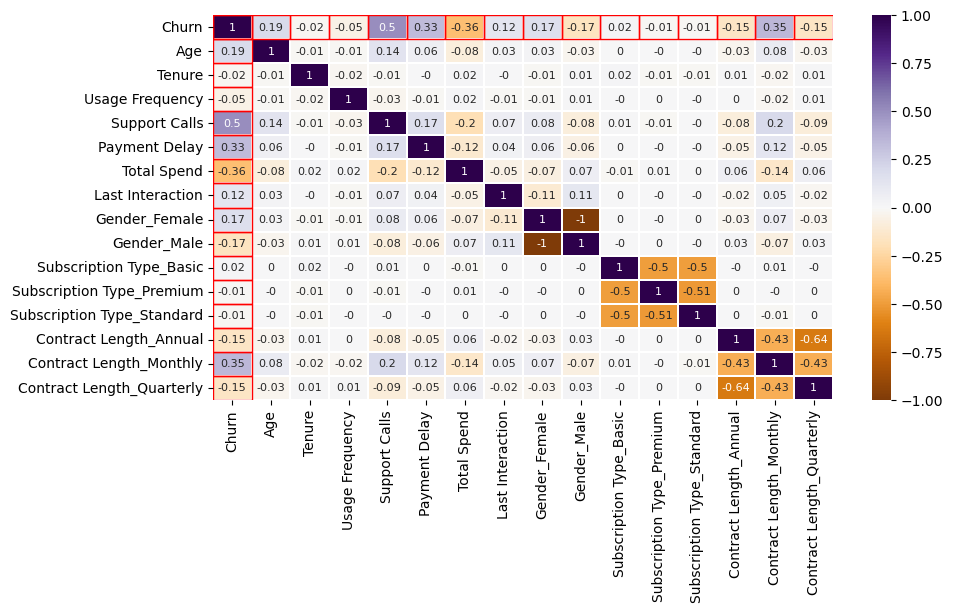

In [15]:
# ---------------- Mapa de correlación  -------------
# Correlación entre variables
plt.figure(figsize=(10, 5))
corr_plot = customer_train.drop('CustomerID', axis=1).corr().round(2)

# Reordenar las columnas y filas para que Churn esté al principio
cols = ['Churn'] + [col for col in corr_plot.columns if col != 'Churn']
corr_plot = corr_plot.loc[cols, cols]

# Crear el heatmap
sns.heatmap(data=corr_plot, annot=True, annot_kws={"size": 8}, cmap='PuOr', linewidth=.1)

highlight_var = 'Churn'
idvar = corr_plot.columns.get_loc(highlight_var)

# Para resaltar columna | fila de Churn
for i in range(len(corr_plot.columns)):
    plt.gca().add_patch(plt.Rectangle((idvar, i), 1, 1, fill=False, edgecolor='red', lw=1))
    plt.gca().add_patch(plt.Rectangle((i, idvar), 1, 1, fill=False, edgecolor='red', lw=1))

plt.show()


### **Selección de características y transformación**:

- ##### **Seleccion de características**: Acorde a los resultados de los analisis pervios, seleccionamos las siguientes caracteristicas para utilizar en los futuros modelos propuestos.
    - Edad
    - Llamados a soporte
    - Retraso en el pago
    - Gasto total
    - Ultima interaccion
    - Sexo femenino, masculino.
    - Contrato mensual, trimestral y anual. 

- ##### **Transformacion y escalado**:
    - Variables Dummy: (Definidas en el apartado previo): Sexo, Tipo de subscripcion, Duracion del contrato.
    - Estandarizacion: Se transforman los datos numericos de manera que cada característica tenga una media de 0 y una desviación estándar de 1 con el objetivo de mejorar el funcionamiento de los modelos sensibles a las escalas de las variables. 

In [16]:
# ------------ Variables a utilizar ------------------

customer_train = customer_train.drop(['CustomerID','Tenure','Usage Frequency','Subscription Type_Basic','Subscription Type_Premium','Subscription Type_Standard'], axis=1)
customer_test = customer_test.drop(['CustomerID','Tenure','Usage Frequency','Subscription Type_Basic','Subscription Type_Premium','Subscription Type_Standard'], axis=1)

In [17]:
# ------------ División de datos ------------------
# Separamos las variables objetivos de las predictoras y eliminamos una de las dummy (en cada categoría que tenga), para evitar correlación.


X_train = customer_train.loc[:, ['Age', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Gender_Female', 'Contract Length_Annual', 'Contract Length_Monthly']].values
y_train = customer_train.loc[:, 'Churn'].values

# ------------ Set de testeo        ------------------

X_test = customer_test.loc[:, ['Age', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Gender_Female', 'Contract Length_Annual', 'Contract Length_Monthly']].values
y_test = customer_test.loc[:, 'Churn'].values


X_train.shape

(424254, 8)

In [18]:
# ------------ Escalado  ------------------

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### **Construccion de modelos**:

In [19]:
# -------------- Se crea función para la matriz de confusión --------------------

def apply_confusion_matrix(y_test, y_pred, model, xticklabels, yticklabels):
  # Se crea la matriz de confusión
  cm = confusion_matrix(y_test, y_pred)

  # Paleta de colores
  cmap = sns.color_palette("rocket_r", as_cmap=True)

  # Visualización de la matriz de confusión
  plt.figure(figsize=(6, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
              xticklabels=xticklabels,
              yticklabels=yticklabels)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title("Matriz de Confusión - " + model)
  plt.show()

  print( model + "- Métricas")

  P = np.sum(cm[1, :]) # Positive
  N = np.sum(cm[0, :]) # Negative
  TP = cm[1, 1] # TP - True Positive | FP - False Positive
  TN = cm[0, 0] # TN - True Negative | FN - False Negative

  # Sensibilidad - Tasa de verdaderos positivos | proporción de verdaderos positivos respecto al total de instancias que realmente pertenecen a la clase positiva.
  TPR = TP/P

  # Especifidad - Tasa de verdaderos negativos
  TNR = TN/N

  # Exactitud balanceada - Cuando hay desbalance, se promedian ambas tasas (Si es 0.5, el clasificador está adivinando)
  balanced_accuracy = (TPR + TNR) / 2

  # Cuando la clase positiva tiene mas importancia que la negativa se puede usar precisión y recuperación
  # Precisión - Proporción de casos positivos correctamente identificados con respecto a todos los etiquetados positivos por el clasificador (TP / (TP + FP))
  #             (qué tan preciso es el modelo cuando predice la clase positiva)
  precision = precision_score(y_test, y_pred, zero_division=0)

  # Recuperación (Recall) - proporción de casos positivos correctamente identificados con respecto a todos los positivos reales (TP / (TP + FN)) Idem. 'sensibilidad'
  recall = recall_score(y_test, y_pred, zero_division=0)

  # F1 Score - Para tener un balance de ambos casos, tanto en precisión como en recuperación.
  f1 = f1_score(y_test, y_pred, zero_division=0)

  # Dataframe de métricas para luego concatenar
  metrics = pd.DataFrame({
      'Modelo': [model],
      'Sensibilidad (TPR)': [TPR],
      'Especificidad (TNR)': [TNR],
      'Exactitud Balanceada': [balanced_accuracy],
      'Precisión': [precision],
      'Recuperación (Recall)': [recall],
      'F1-score': [f1]
  })

  return metrics

- ##### **Regresion Logística**: 
Se decide entrenar inicialmente un modelo Regresión Logística ya que la misma es adecuada para problemas de clasificacion, sencillo de implementar e interpretar. La misma sera la base de comparacion con otros modelos mas complejos. 


In [20]:
# ------------ Modelo de Regresión Logística ------------------

from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(random_state = 42, class_weight="balanced")
model_logistic.fit(X_train, y_train)

# Valores predichos con base de testeo
y_pred = model_logistic.predict(X_test)

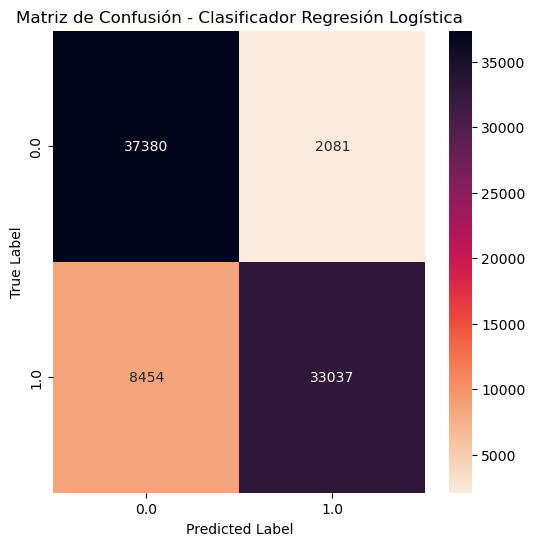

Clasificador Regresión Logística- Métricas


,Modelo,Sensibilidad (TPR),Especificidad (TNR),Exactitud Balanceada,Precisión,Recuperación (Recall),F1-score
0,Clasificador Regresión Logística,0.796245,0.947264,0.871755,0.940743,0.796245,0.862484


In [21]:
# ------------ Metricas Regresión Logística ------------------
metrics_log = apply_confusion_matrix(y_test, y_pred, "Clasificador Regresión Logística", model_logistic.classes_, model_logistic.classes_)
metrics_log

- ##### **Arbol de decisión**: 
Se construye un modelo de Árbol de Decisión debido a su capacidad para manejar relaciones no lineales, su habilidad para capturar interacciones complejas entre variables y su robustez frente a outliers. Asi mismo, la estructura jerárquica permite que cada decisión tomada por el modelo sea clara y comprensible, facilitando la explicación de los resultados a partes interesadas no técnicas.

In [22]:
# ------------ Modelo Arbol de decision ------------------

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


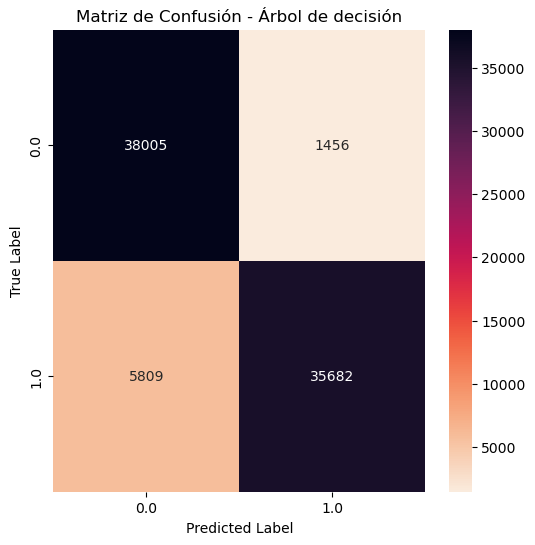

Árbol de decisión- Métricas


,Modelo,Sensibilidad (TPR),Especificidad (TNR),Exactitud Balanceada,Precisión,Recuperación (Recall),F1-score
0,Árbol de decisión,0.859994,0.963103,0.911548,0.960795,0.859994,0.907604


In [23]:
# ------------ Metricas Arbol de decision ------------------

metrics_tree = apply_confusion_matrix(y_test, y_pred, "Árbol de decisión", model_logistic.classes_, model_logistic.classes_)
metrics_tree

- ##### **Arbol de decisión - Optimizado -**: 
Se decidió optimizar el modelo de Árbol de Decisión utilizando Optuna para seleccionar los mejores hiperparámetros, dado que los árboles de decisión son efectivos en problemas de predicción de abandono (churn). 

En este sentido, la optimización de hiperparámetros es crucial porque el rendimiento del Árbol de Decisión depende de configuraciones como la profundidad máxima del árbol, el criterio de división y el número mínimo de muestras en los nodos. Una configuración óptima de estos hiperparámetros puede mejorar significativamente la capacidad del modelo para generalizar a nuevos datos, evitando problemas de sobreajuste o subajuste.

Buscamos con esto maximizar el rendimiento del modelo en términos de recall, precisión y F1-score. Además, esta optimización permitirá comparar el Árbol de Decisión mejorado con un modelo de Random Forest para determinar cuál ofrece un mejor balance entre precisión y eficiencia en la predicción de abandono, asegurando así la selección del modelo más robusto y eficiente


In [24]:
# ------------ Opotuna ------------------
import optuna

def objective(trial):
    max_depth = trial.suggest_int("max_depth", 1, 30)
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)

    classifier = DecisionTreeClassifier(criterion=criterion, splitter='best',
                                        max_depth=max_depth, min_samples_split=min_samples_split,
                                        min_samples_leaf=min_samples_leaf, random_state=42)

    # Realizamos la validación cruzada
    score = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)

    return score.mean()

def champion_callback(study, frozen_trial):
    """
    Mostramos menos información, sino es demasiado verboso
    """
    winner = study.user_attrs.get("winner", None)
    if study.best_value and winner != study.best_value:
        study.set_user_attr("winner", study.best_value)
        if winner:
            improvement_percent = (abs(winner - study.best_value) / study.best_value) * 100
            print(
                f"Trial {frozen_trial.number} achieved value: {frozen_trial.value} with "
                f"{improvement_percent: .4f}% improvement"
            )
        else:
            print(f"Initial trial {frozen_trial.number} achieved value: {frozen_trial.value}")

# ----------------------------------------------------------------

# Se crea un estudio de Optuna

optuna.logging.set_verbosity(optuna.logging.ERROR)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10, callbacks=[champion_callback])

Initial trial 0 achieved value: 0.9304990182877839
Trial 1 achieved value: 0.9438774675212878 with  1.4174% improvement
Trial 3 achieved value: 0.9464462956806795 with  0.2714% improvement
Trial 6 achieved value: 0.946844714714187 with  0.0421% improvement
Trial 8 achieved value: 0.9479776006689686 with  0.1195% improvement


In [25]:
# ------------ Optuna: Hiperparametros ------------------
# Se guardan los mejores hiperparámetros hallados

best_params = study.best_params
best_params

{'max_depth': 11,
 'criterion': 'entropy',
 'min_samples_split': 9,
 'min_samples_leaf': 7}

In [26]:
# ------------ Modelo Arbol optimizado ------------------
tree_classification = DecisionTreeClassifier(**best_params, random_state=42)

# Y ese entrena el modelo

tree_classification.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=7,
                       min_samples_split=9, random_state=42)

In [27]:
# ------------ Arbol optimizado: Graphviz ------------------
from sklearn.tree import export_graphviz


export_graphviz(tree_classification, out_file = "arbol_clasificacion_churn.dot",
                feature_names=['Age', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Gender_Female', 'Contract Length_Annual', 'Contract Length_Monthly'],
                class_names=["Recuperado", "Baja"],
                rounded=True,
                filled=True)


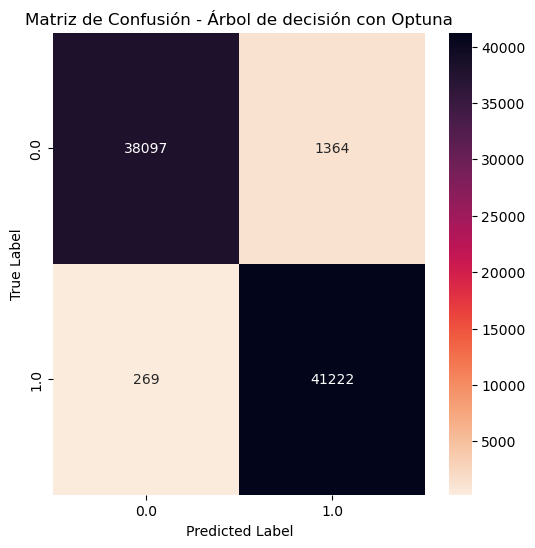

Árbol de decisión con Optuna- Métricas


,Modelo,Sensibilidad (TPR),Especificidad (TNR),Exactitud Balanceada,Precisión,Recuperación (Recall),F1-score
0,Árbol de decisión con Optuna,0.993517,0.965434,0.979475,0.967971,0.993517,0.980577


In [28]:
# ------------ Metricas Arbol optimizado ------------------
y_pred  = tree_classification.predict(X_test)

metrics_tree_optuna = apply_confusion_matrix(y_test, y_pred, "Árbol de decisión con Optuna", model_logistic.classes_, model_logistic.classes_)
metrics_tree_optuna


- ##### **Random Forest**:

Se construye un modelo de Random Forest para mejorar la precisión predictiva mediante el uso de múltiples árboles de decisión. Random Forest combina múltiples árboles de decisión para reducir la varianza y minimizar el riesgo de sobreajuste, logrando un mejor rendimiento en datasets complejos.

In [29]:
# ------------ Modelo Random forest ------------------

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

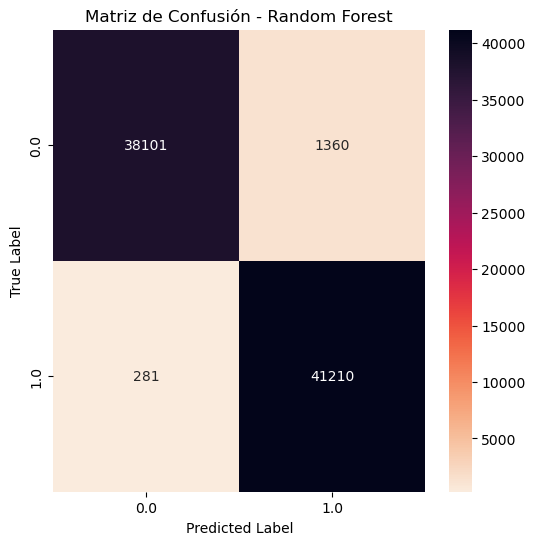

Random Forest- Métricas


,Modelo,Sensibilidad (TPR),Especificidad (TNR),Exactitud Balanceada,Precisión,Recuperación (Recall),F1-score
0,Random Forest,0.993227,0.965536,0.979382,0.968053,0.993227,0.980478


In [30]:
# ------------ Metricas Random forest ------------------
y_pred = rf.predict(X_test)

metrics_rf = apply_confusion_matrix(y_test, y_pred, "Random Forest", model_logistic.classes_, model_logistic.classes_)
metrics_rf

- ##### **Red Neuronal**: 

Se construye un modelo de Red Neuronal para captar patrones complejos y no lineales en grandes volúmenes de datos, pudiendo modelar interacciones no evidentes entre características, lo que las podria hacer particularmente utiles en datasets como el de churn. 
Además, las redes neuronales son conocidas por su capacidad de generalización, lo que significa que pueden adaptarse bien a nuevos datos si se entrenan adecuadamente y se optimizan de manera efectiva.


In [31]:
# ------------ Modelo Red neuronal ------------------
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

boolean_columns = ['Gender_Female', 'Gender_Male', 'Contract Length_Annual', 'Contract Length_Monthly', 'Contract Length_Quarterly']
customer_train[boolean_columns] = customer_train[boolean_columns].astype(int)
customer_test[boolean_columns] = customer_test[boolean_columns].astype(int)

# Se dividen variables predictoras / objetivo
X_train = customer_train.drop('Churn', axis=1).values
y_train = customer_train['Churn'].values

X_test = customer_test.drop('Churn', axis=1).values
y_test = customer_test['Churn'].values

# Escalamiento de valores
scaler = StandardScaler()
X_train[:, :5] = scaler.fit_transform(X_train[:, :5])
X_test[:, :5] = scaler.fit_transform(X_test[:, :5])

# Se pasa todo a tensores
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Se define clase del modelo
class ChurnModel(nn.Module):
    def __init__(self):
        super(ChurnModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Modelo
model = ChurnModel()

# Función de pérdida y optimizador
criterion = nn.BCELoss()  # Usamos entropía cruzada binaria
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lista que mida el error en el loop
errors = list()

# Entrenamiento del modelo
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()               # Limpieza de gradientes
    outputs = model(X_train)            # Cálculo de predicciones
    loss = criterion(outputs, y_train)  # cálculo del error
    loss.backward()                     # Propragación del error
    optimizer.step()                    # Optimización de parámetros

    # Se imprime en pantalla a medida que avanza
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Se guardan los errores a medida que avanza en loop
    errors.append(loss.item())

# Evaluación del modelo
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred > 0.5).float() # Tansformación a binario, con umbral 0.5
    accuracy = (y_pred.eq(y_test).sum() / float(y_test.shape[0])).item()
    print(f'Accuracy: {accuracy:.4f}')


Epoch [10/100], Loss: 0.6693
Epoch [20/100], Loss: 0.6190
Epoch [30/100], Loss: 0.5575
Epoch [40/100], Loss: 0.4929
Epoch [50/100], Loss: 0.4400
Epoch [60/100], Loss: 0.4056
Epoch [70/100], Loss: 0.3855
Epoch [80/100], Loss: 0.3730
Epoch [90/100], Loss: 0.3640
Epoch [100/100], Loss: 0.3563
Accuracy: 0.9115


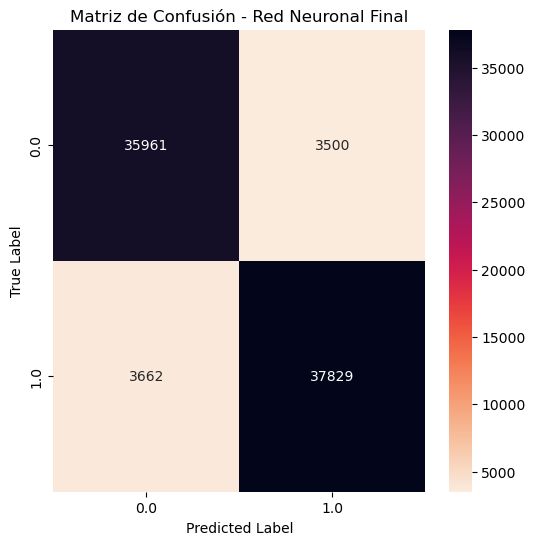

Red Neuronal Final- Métricas


,Modelo,Sensibilidad (TPR),Especificidad (TNR),Exactitud Balanceada,Precisión,Recuperación (Recall),F1-score
0,Red Neuronal Final,0.91174,0.911305,0.911522,0.915314,0.91174,0.913523


In [32]:
# Se evalua el modelo
metrics_torch_test = apply_confusion_matrix(y_test, y_pred, "Red Neuronal Final", [0.0, 1.0],[0.0, 1.0])
metrics_torch_test

- ##### **XGBOOST**:
Se construye un modelo de XGBoost para aprovechar su capacidad de boosting y obtener un alto rendimiento predictivo. La regulación incorporada en XGBoost ayuda a evitar el sobreajuste y a optimizar la capacidad de detección de bajas de clientes en el conjunto de datos.


In [33]:
# ------------ Modelo XGBOOST------------------

import xgboost as xgb

# XGBoost con hiperparámetros por defecto
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
xgb_regressor.fit(X_train, y_train)

# Calculamos las métricas
y_pred_xgb = xgb_regressor.predict(X_test)

# Se define un umbral de 0.5 para convertir predicciones continuas en predicciones binarias
threshold = 0.5  # Puedes ajustar este valor según tus necesidades
y_pred_xgb_binary = (y_pred_xgb >= threshold).astype(int)



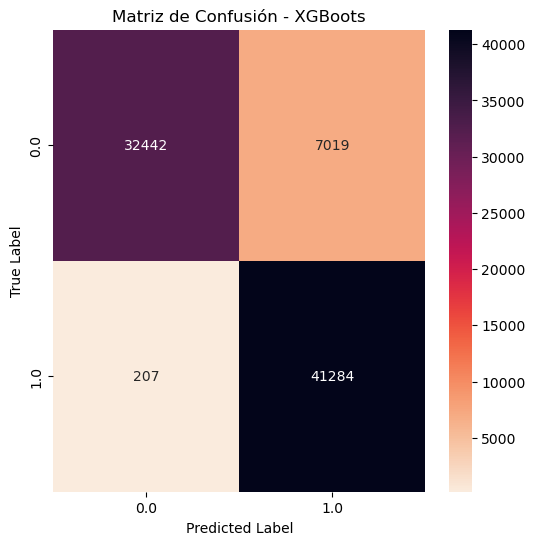

XGBoots- Métricas


,Modelo,Sensibilidad (TPR),Especificidad (TNR),Exactitud Balanceada,Precisión,Recuperación (Recall),F1-score
0,XGBoots,0.995011,0.822128,0.90857,0.854688,0.995011,0.919527


In [34]:
# ------------ Metricas XGBOOST------------------
# Matriz de confusión
metrics_xgb = apply_confusion_matrix(y_test, y_pred_xgb_binary, "XGBoots", [0.0, 1.0],[0.0, 1.0])
metrics_xgb

### **Evaluación de desempeño**: 
En un problema de abandono (churn), donde el objetivo principal es identificar a los clientes que tienen una alta probabilidad de abandonar un servicio o producto, es crucial que el recall sea alto.

Un alto recall asegura que el mayor número posible de clientes en riesgo de irse sean detectados, lo que permite tomar medidas preventivas para retenerlos. Aunque la precisión y otras métricas también son importantes, en un contexto donde la pérdida de clientes tiene un impacto significativo en el negocio, fallar en identificar a estos clientes puede resultar en una pérdida de ingresos considerable. Por lo tanto, un alto recall es fundamental para minimizar el riesgo de no actuar a tiempo sobre aquellos que realmente tienen intención de irse, asegurando así la efectividad de las estrategias de retención.

In [35]:
# ------------ Metricas combinadas ------------------

combined_metrics = pd.concat([metrics_log, metrics_rf, metrics_tree, metrics_tree_optuna, metrics_torch_test, metrics_xgb], axis=0, ignore_index=True)
combined_metrics

,Modelo,Sensibilidad (TPR),Especificidad (TNR),Exactitud Balanceada,Precisión,Recuperación (Recall),F1-score
0,Clasificador Regresión Logística,0.796245,0.947264,0.871755,0.940743,0.796245,0.862484
1,Random Forest,0.993227,0.965536,0.979382,0.968053,0.993227,0.980478
2,Árbol de decisión,0.859994,0.963103,0.911548,0.960795,0.859994,0.907604
3,Árbol de decisión con Optuna,0.993517,0.965434,0.979475,0.967971,0.993517,0.980577
4,Red Neuronal Final,0.911740,0.911305,0.911522,0.915314,0.911740,0.913523
5,XGBoots,0.995011,0.822128,0.908570,0.854688,0.995011,0.919527


Dado el análisis de los modelos, y enfocándonos en la métrica de recall, se destacan tres modelos que han alcanzado un 99% de recall: Random Forest, Árbol de decisión con Optuna y XGBoost. Estos modelos han demostrado una excelente capacidad para identificar correctamente a los clientes en riesgo de abandono.

Para elegir el mejor modelo entre los tres, todos con un 99% de recall, se decidió evaluar la precisión de cada uno. Con este enfoque, se busca el modelo que ofrezca el mejor equilibrio entre recall y precisión, lo que se refleja en un F1-score más alto. Esta métrica nos permitirá seleccionar el modelo que no solo identifica correctamente a la mayoría de los clientes en riesgo, sino que también minimiza los falsos positivos, asegurando así una estrategia de retención más precisa y efectiva, evitando la perdida de dinero por utilizar recursos intentando retener clientes que no pensaban en abandonar. 


In [36]:
# ------------ Metricas combinadas 2 ------------------
combined_metrics_best = pd.concat([metrics_rf, metrics_tree_optuna, metrics_xgb], axis=0, ignore_index=True)
combined_metrics_best

,Modelo,Sensibilidad (TPR),Especificidad (TNR),Exactitud Balanceada,Precisión,Recuperación (Recall),F1-score
0,Random Forest,0.993227,0.965536,0.979382,0.968053,0.993227,0.980478
1,Árbol de decisión con Optuna,0.993517,0.965434,0.979475,0.967971,0.993517,0.980577
2,XGBoots,0.995011,0.822128,0.908570,0.854688,0.995011,0.919527


## Conclusión

El modelo de Árbol de Decisión optimizado con Optuna logro superar al XGBoost en términos de F1-score (0.98 vs 0.91). Asi mismo, obtuvo niveles comparables con los resultados del Random Forest (0.98 vs 0.98). Esta mejora significativa se debe a que el ajuste preciso de hiperparámetros permitió al árbol de decisión equilibrar de manera más efectiva recall y precisión.

Aunque Random Forest y XGBoost son modelos robustos, la optimización del Árbol de Decisión permitió una adaptación más fina a las características del conjunto de datos, logrando una mejor combinación de precisión y recall respecto del Arbol original. Esto subraya la importancia del ajuste de hiperparámetros para mejorar el rendimiento en problemas específicos de clasificación.

